## Processing Ocean Color Imagery - Visualize Convert Images to Ocean Color

Pull in all images as modified and metadata with specific functions
    Visualize for issues and shadows and bright spots and locations
    correct for sky radiance
    visualize the distributions of both sky (clouds) and sea
    look at the variability of spectra both for specific pixels and across nearby images
    filter for orientation and location and issues

take the water leaving spectra and convert to chla as well as other future products and just intro general analysis of spectra
    produce a csv or .shp or images of ocean color products 
    

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import geopandas as gpd

import os, glob
import multiprocessing

import cv2
import numpy as np
import matplotlib.pyplot as plt

import exiftool
import datetime

import rasterio

### Helper Functions

In [2]:
import glob, os
from GPSPhoto import gpsphoto

def load_img_fn_and_meta(img_dir, count, start):
    i = 0
    j = 0
    if not count:
        count = 10000
    img_metadata = []
    imgs = []
    for file in glob.glob(img_dir + "/*.tif"):
        if j >= count:
            pass
        elif i < start:
            pass
        else:
            imgs.append(file)
            md = gpsphoto.getGPSData(file)
            md['filename'] = file.split('/')[-1]
            img_metadata.append(md)
            j += 1
        i += 1
        
    return(imgs, img_metadata)

In [3]:
al = [0,1,2,3,4,5]
il = [0,3,5]

[al[i] for i in il]

[0, 3, 5]

In [4]:
def load_images(img_list):
    all_imgs = []
    for im in img_list:
        with rasterio.open(im, 'r') as src:
            all_imgs.append(src.read())
    return(all_imgs)

### Primary Processing Function

In [5]:
def retrieve_imgs_and_metadata(img_dir, count=None, start=0, altitude_cutoff = 0):
    img_fns, img_metadata = load_img_fn_and_meta(img_dir, count=count, start=start)
    idxs = []
    for i, md in enumerate(img_metadata):
        if md['Altitude'] > altitude_cutoff:
            idxs.append(i)
    [al[i] for i in il]
    imgs = load_images([img_fns[i] for i in idxs])
    imgs = np.array(imgs) / 32768 # this corrects it back to reflectance
    print('Output shape is: ', imgs.shape)
    return(imgs, [img_metadata[i] for i in idxs])

### Exploring Variability of Ocean Color Data
visualize all the band values as histograms

look into the varability of each image's bottom 5,25,10,5,1 % of values

look into the variability of the median of the sky values

look into chl variability calculated from different images based on different darkest pixels

In [24]:
('data/040321_duml_testing/sky/../skystacks',
 'data/040321_duml_testing/sea/../seastacks')

('data/040321_duml_testing/sky/../skystacks',
 'data/040321_duml_testing/sea/../seastacks')

In [14]:
sky_output = 'data/040321_duml_testing/skystacks'
sea_output = 'data/040321_duml_testing/seastacks'

sea_imgs, sea_img_metadata = retrieve_imgs_and_metadata(sea_output, count=50, start=0, altitude_cutoff=20)

Output shape is:  (35, 6, 1471, 2024)


In [15]:
sea_img_metadata[0]

{'Latitude': 34.71414722222222,
 'Longitude': -76.67404722222223,
 'Altitude': 35.8,
 'UTC-Time': '16:33:54',
 'Date': '03/04/2021',
 'filename': 'ssNzzmZLkRg4Kffm2g8N.tif'}

In [16]:
sky_imgs, sky_img_metadata = retrieve_imgs_and_metadata(sky_output, count=20, altitude_cutoff=30)

Output shape is:  (14, 6, 1471, 2024)


In [17]:
sea_imgs.nbytes / 1e9

5.00187072

Inspect the band means

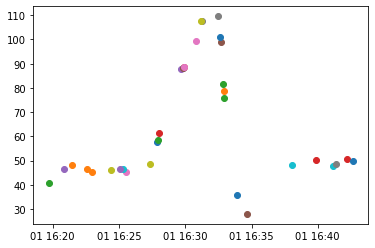

In [18]:
import datetime

for md in sea_img_metadata:
    plt.scatter(datetime.datetime.strptime(md['UTC-Time'], '%H:%M:%S'), md['Altitude'])

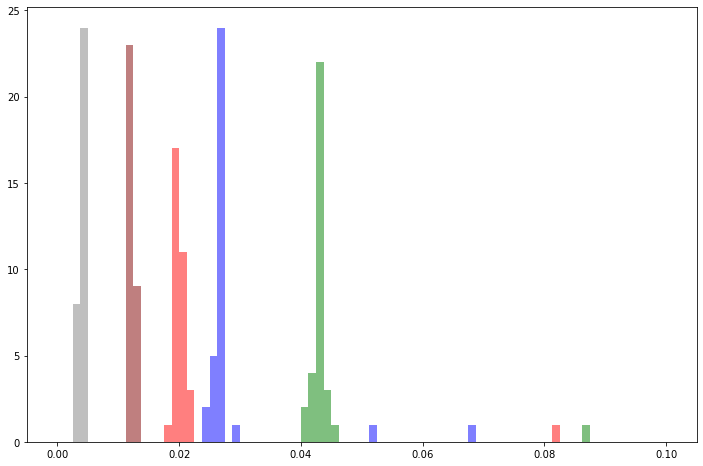

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

band_names = ['blue', 'green', 'red', 'nir', 'red edge']
colors = ['blue', 'green', 'red', 'maroon', 'grey']

for i in range(0,5):
    
    ax.hist(np.mean(sea_imgs[:,i],axis=(1,2)).flatten(), range=(0,0.1), bins=80, color=colors[i], alpha=0.5)
    #ax.set_xlim(0,0.10)
    #im = ax[i].imshow(all_imgs[0,i])
    #fig.colorbar(im, ax=ax[i])

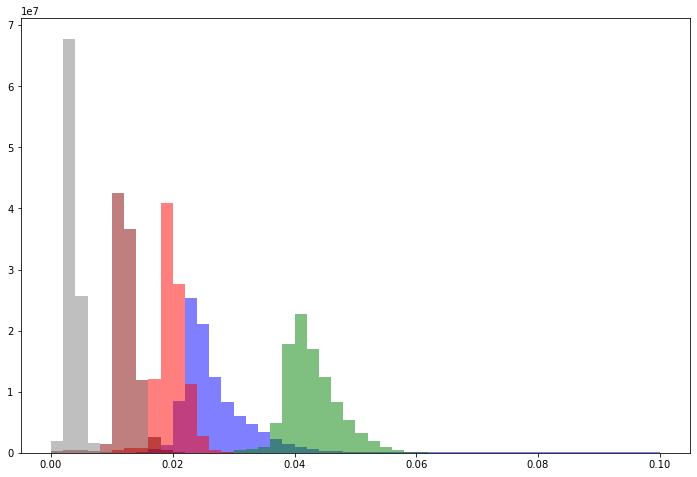

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

band_names = ['blue', 'green', 'red', 'nir', 'red edge']
colors = ['blue', 'green', 'red', 'maroon', 'grey']

for i in range(0,5):
    
    ax.hist(sea_imgs[:40,i].flatten(), range=(0,0.1), bins=50, color=colors[i], alpha=0.5)
    #ax.set_xlim(0,0.10)
    #im = ax[i].imshow(all_imgs[0,i])
    #fig.colorbar(im, ax=ax[i])

(array([1.67000e+02, 3.34000e+02, 1.43500e+03, 2.56000e+03, 4.52200e+03,
        5.15500e+03, 7.74200e+03, 1.01410e+04, 1.17040e+04, 8.03200e+03,
        1.15700e+04, 1.77930e+04, 1.89580e+04, 1.91900e+04, 2.28310e+04,
        2.82540e+04, 3.46360e+04, 3.70270e+04, 4.19660e+04, 3.60260e+04,
        4.97220e+04, 5.10070e+04, 5.38580e+04, 5.28410e+04, 5.27620e+04,
        5.67620e+04, 5.99900e+04, 6.26660e+04, 6.97180e+04, 6.53120e+04,
        8.82830e+04, 9.92870e+04, 1.08495e+05, 1.24260e+05, 1.36139e+05,
        1.45466e+05, 1.61665e+05, 1.88326e+05, 2.05603e+05, 1.76431e+05,
        2.10223e+05, 1.78134e+05, 1.25349e+05, 7.39380e+04, 3.67650e+04,
        1.53880e+04, 6.38700e+03, 2.15900e+03, 2.57000e+02, 6.80000e+01]),
 array([4.51 , 4.559, 4.608, 4.657, 4.706, 4.755, 4.804, 4.853, 4.902,
        4.951, 5.   , 5.049, 5.098, 5.147, 5.196, 5.245, 5.294, 5.343,
        5.392, 5.441, 5.49 , 5.539, 5.588, 5.637, 5.686, 5.735, 5.784,
        5.833, 5.882, 5.931, 5.98 , 6.029, 6.078, 6.127

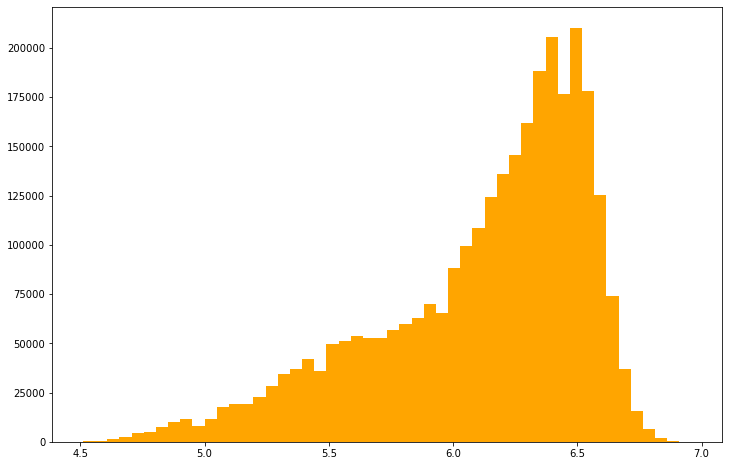

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

band_names = ['thermal']
colors = ['orange']

ax.hist(sea_imgs[2,5].flatten()* 32768 / 100 - 273, bins=50, color=colors[0])

0
ssNzzmZLkRg4Kffm2g8N.tif


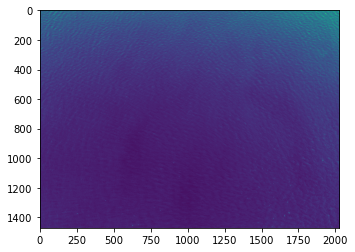

1
mB3k20HFMMOotf5PcnHy.tif


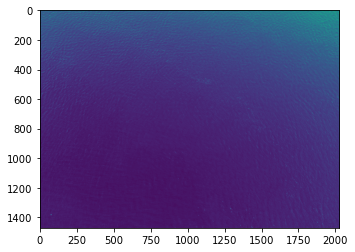

2
JXAoHB3EWaVAFfN3CP6h.tif


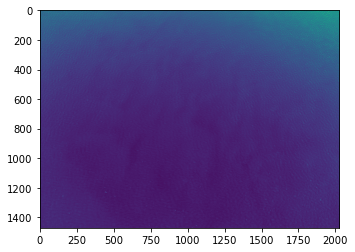

3
xiuyP7pYoYyIAke3UzQZ.tif


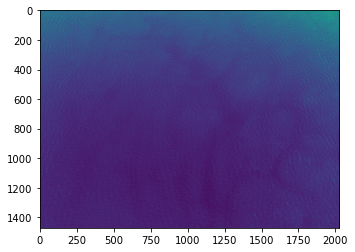

4
0ghHMjKrmTTWBhEvi04V.tif


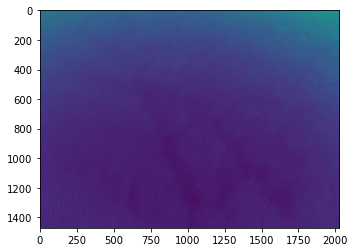

5
T7IB1NsBR5GNIVngeOB7.tif


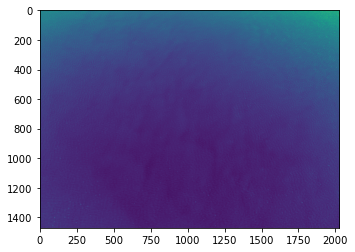

6
8Z5ooNazI6lLpOya97K9.tif


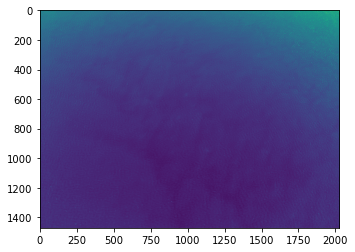

7
69v7fDpwKdJHwIAtii0W.tif


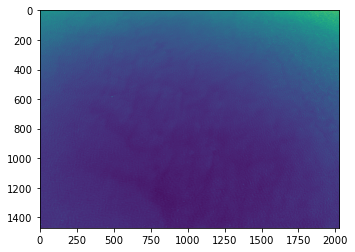

8
jfKBX4MszsjRYjRV7al0.tif


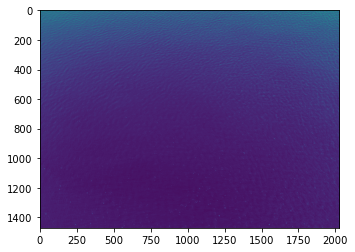

9
3Gz3bYfewCCsqbrFar85.tif


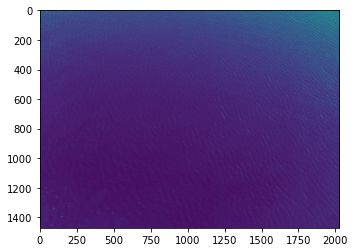

10
5au0aJmpNXXEAlIw8nBU.tif


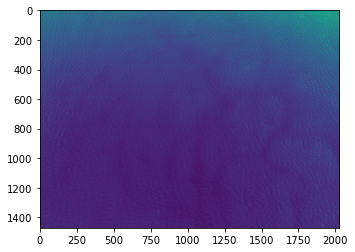

11
551aKgRpe6q6tKk4WWh9.tif


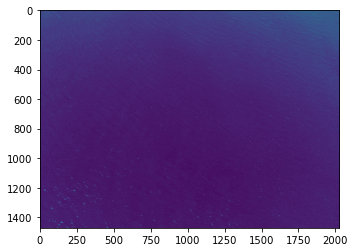

12
ombvQp62RLKi6mH10w3Z.tif


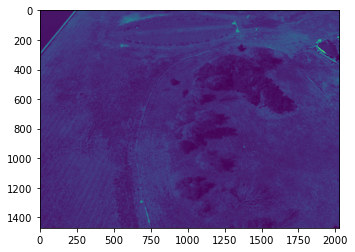

13
5IQH13VzvWI7mpPOc4XU.tif


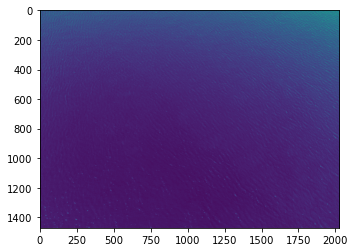

14
7aYfzV5cexLYFnYjfizI.tif


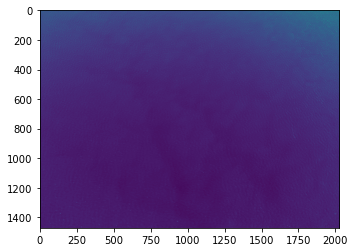

15
EmhOdibuIS89g7fIN9jJ.tif


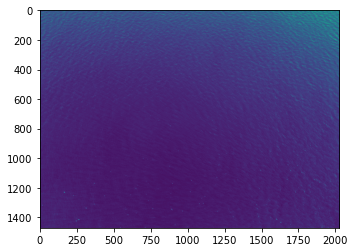

16
KN1yQtJVtENyEYfQ2hej.tif


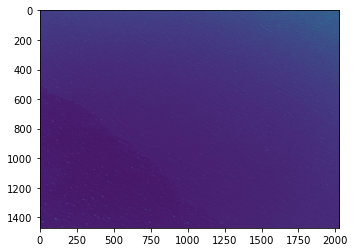

17
2jHa2SoPnhvChl6JNxjb.tif


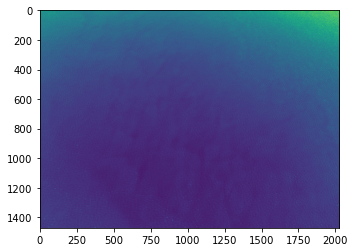

18
6yPYJjc2BrBFlA3RxMMm.tif


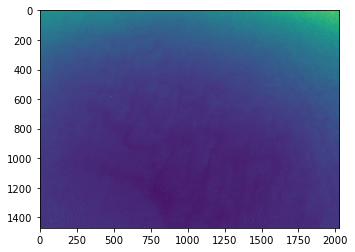

19
6pndq9XBByPyRCYzdUfg.tif


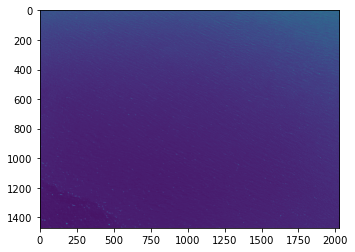

20
E45sc4hbvlT74PwMEpNU.tif


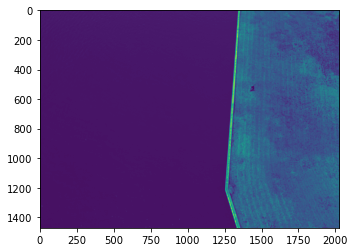

21
1Idlk6aSI8ikjECDrjiL.tif


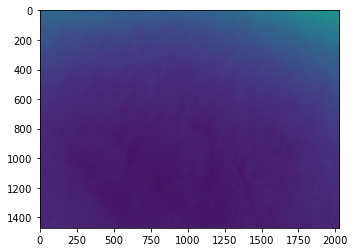

22
ai5zP5iesqLPNBAZSka9.tif


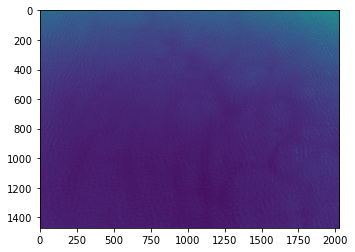

23
Qjq0j4FAL4hUzwFjceiV.tif


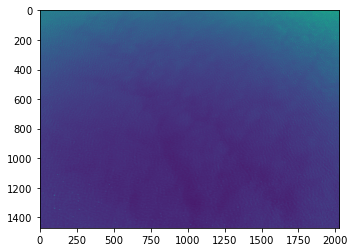

24
DpFC0kchTeNKt0aXwEGE.tif


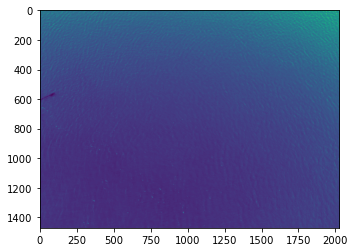

25
hYv3IW41BNWamh3SNvnt.tif


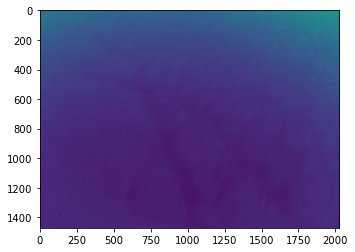

26
EjBdGO3xxUwwsa02v2Vb.tif


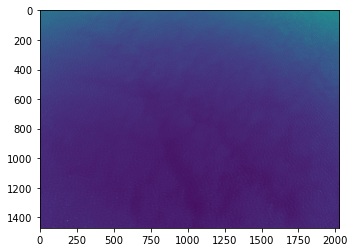

27
OrDyjaKvvlV0U5thNlVd.tif


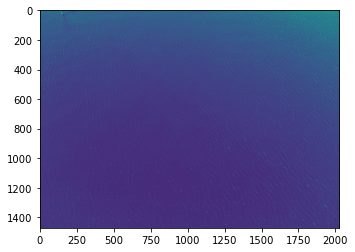

28
jbJwXzUmP7I5DWtVs0z8.tif


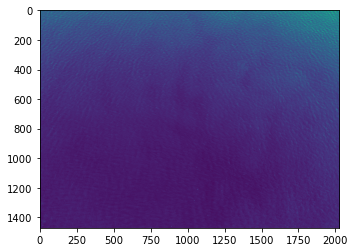

29
3meJOn9KGNs4vMLkSltx.tif


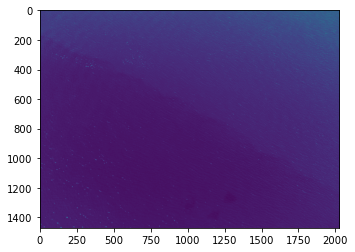

30
Uv2aYeZSywZ7n593tCF8.tif


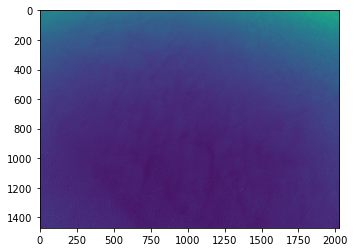

31
A4mW4q6K9N0VPOs9EFI5.tif


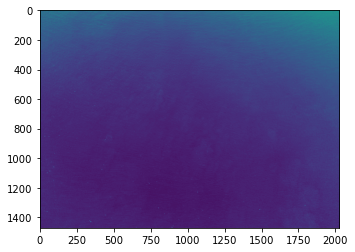

32
WHt1rf4IykAupRIx7OvU.tif


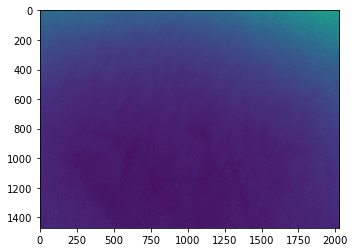

33
X46VQX43XhfkZbO4XP3r.tif


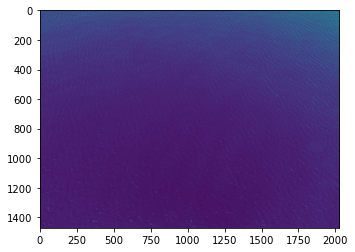

34
OW0gge1Sy7kZWlaKK6tN.tif


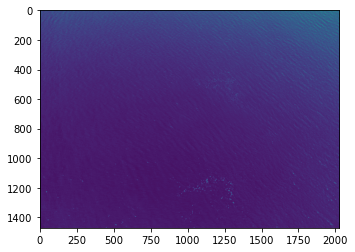

IndexError: index 35 is out of bounds for axis 0 with size 35

In [19]:
for i in range (0,43):
    plt.imshow(sea_imgs[i,0])
    print(i)
    print(sea_img_metadata[i]['filename'])
    plt.show()

### Cut off the bright outliers

Visualize a few random images and take out the X% of brightest pixels

In [20]:
full_sea_img = sea_imgs[0]

full_sea_img.shape

(6, 1471, 2024)

In [21]:
# TODO this should probably pick out the darkest from each band and then use those all together

In [23]:
def calculate_spectra_from_darkest_px(imgs, lowest_percent=0.75, band=4, return_imgs=False, visualize=False, sky=False):
    list_of_spectra = []
    sorted_img_list = []
    dark_idxs = []
    
    for i in range(0,imgs.shape[0]):
        print(i)
        if np.mean(imgs[i,0]) > 5 and not sky: # why am I doing this? I assume for thermal
            print(np.mean(imgs[i,0]))
            print('hitting this filter for brightness')
            continue
        # choose the percent to sort
        spectra = []
        #print(imgs.shape)
        num_to_sort = int(imgs[i,band].size * lowest_percent)
        #print('sorting ', num_to_sort)

        # efficiently sort the array
        flat_array = imgs[i,band].flatten()
        flat_array[flat_array == 0 ] = 1 # everything already equal to zero set to 1 to be ignored
        flat_array[flat_array < 0.0001 ] = 1 # take out dark pixels to be ignored
        idx = np.argpartition(flat_array, num_to_sort)[:num_to_sort]
        
        img_sorted = []
        blue_spec = None
        for img_idx in range(0,5):
            sorted_band = imgs[i,img_idx].flatten()
            if return_imgs:
                # add the sorted band to
                img_sorted.append(sorted_band)
            # take the mean of the darkest pixels from each band to add to the spectra
            spectra.append(np.mean(sorted_band[idx]))
            if img_idx == 0:
                blue_spec = np.mean(sorted_band[idx])
        if return_imgs:
            sorted_img_list.append(np.array(img_sorted))
        #if blue_spec <0.02:
        list_of_spectra.append(spectra)
        dark_idxs.append(i)
        
        if visualize:
            plt.hist(flat_array[idx], density=False)
            plt.axvline(x=np.mean(flat_array[idx]), color='red')
            plt.axvline(x=np.median(flat_array[idx]), color='black')
            print(i, np.median(flat_array[idx]))
            
    if return_imgs:
        return(sorted_img_list, idx)
    else:
        return(list_of_spectra, dark_idxs)

In [24]:
def remove_bright_pix(im, lowest_percent=0.75, band=0):

    sorted_imgs, lowest_idx = calculate_spectra_from_darkest_px(np.array([im]), lowest_percent=lowest_percent, band=band, return_imgs=True)
    
    dark_pix = np.zeros(np.array(sorted_imgs[0]).shape)
    dark_pix[:,lowest_idx] = sorted_imgs[0][:,lowest_idx]
    
    # cut out the super dark pix
    dark_pix[dark_pix < 0.0005] = 0
    dark_pix[dark_pix > 1 ] = 0
    dark_pix[dark_pix == 0] = np.nan
    
    return(dark_pix)

In [25]:
# TODO update this with the proper coefficients

In [26]:
def L2chlor_a(Rrs443, Rrs488, Rrs547, Rrs555, Rrs667):
    ''' Use weighted MODIS Aqua bands to calculate chlorophyll concentration
    using oc3m blended algorithm with CI (Hu et al. 2012) '''

    thresh = [0.15, 0.20]
    a0 = 0.2424
    a1 = -2.7423
    a2 = 1.8017
    a3 = 0.0015
    a4 = -1.2280

    ci1 = -0.4909
    ci2 = 191.6590
    
    if Rrs443 > Rrs488:
        Rrsblue = Rrs443
    else:
        Rrsblue = Rrs488

    log10chl = a0 + a1 * (np.log10(Rrsblue / Rrs547)) \
        + a2 * (np.log10(Rrsblue / Rrs547))**2 \
            + a3 * (np.log10(Rrsblue / Rrs547))**3 \
                + a4 * (np.log10(Rrsblue / Rrs547))**4

    oc3m = np.power(10, log10chl)

    CI = Rrs555 - ( Rrs443 + (555 - 443)/(667 - 443) * \
        (Rrs667 -Rrs443) )
        
    ChlCI = 10** (ci1 + ci2*CI)

    if ChlCI <= thresh[0]:
        chlor_a = ChlCI
    elif ChlCI > thresh[1]:
        chlor_a = oc3m
    else:
        chlor_a = oc3m * (ChlCI-thresh[0]) / (thresh[1]-thresh[0]) +\
            ChlCI * (thresh[1]-ChlCI) / (thresh[1]-thresh[0])

    return chlor_a


In [216]:
Rrsblue = 0.1
Rrs547 = 0.20

a0 = 0.2424
a1 = -2.7423
a2 = 1.8017
a3 = 0.0015
a4 = -1.2280

ci1 = -0.4909
ci2 = 191.6590


log10chl = a0 + a1 * (np.log10(Rrsblue / Rrs547)) \
    + a2 * (np.log10(Rrsblue / Rrs547))**2 \
        + a3 * (np.log10(Rrsblue / Rrs547))**3 \
            + a4 * (np.log10(Rrsblue / Rrs547))**4

oc3m = np.power(10, log10chl)
log10chl, oc3m

(1.2210578885927348, 16.636343870934084)

In [27]:
def chla_img(sky_spectra, dark_pix, wind_speed = 5):
    dp_shape = dark_pix.shape
    sky_rad_correction = np.reshape(np.array(sky_spectra) * (0.0256 + 0.00039 * wind_speed + 0.000034 * wind_speed * wind_speed), (5,1))
    water_leaving = dark_pix.reshape(5,-1) - sky_rad_correction
    
    chlas = []
    for i in range(water_leaving.shape[-1]):
        chlas.append(L2chlor_a(water_leaving[0,i],water_leaving[0,i],water_leaving[1,i],water_leaving[1,i],water_leaving[2,i]))
    chlas = np.array(chlas)
    return(chlas.reshape(dp_shape[1:3]))

In [28]:
def visualize_chla_across_thresholds(im, sky_spectra):
    thresholds = np.arange(0.1,1,0.1)
    fig, ax = plt.subplots(len(thresholds),1, figsize=(12,40))
    for i,lowest_percent in enumerate(thresholds):
        dark_pix = remove_bright_pix(im, lowest_percent=lowest_percent, band=0)
        full_chla_img = chla_img(sky_spectra, dark_pix.reshape(im.shape), wind_speed = 5)
        
        ims = ax[i].imshow(full_chla_img, interpolation='nearest', cmap='jet', vmax=0.5)
        ax[i].set_title(lowest_percent)
        #current_cmap = matplotlib.cm.get_cmap()
        #current_cmap.set_bad(color='yellow')
        fig.colorbar(ims, ax=ax[i], fraction=0.046, pad=0.04)

In [29]:
def visualize_darkest_pixels(im, lowest_percent=0.5, band=0, only_img=False):
    if im.shape[0] == 6: # because these are altum images
        im_flat = im[:-1].reshape(5,-1)
    else:
        im_flat = im.reshape(5,-1)
    # sort to get the darkest x pixels
    
    # visualize all bands and an RGB composite
    

    band_names = ['blue', 'green', 'red', 'nir', 'red edge']
    colors = ['blue', 'green', 'red', 'maroon', 'grey']
    
    fig, ax = plt.subplots(1,5, figsize=(16,14))
    for i,a in enumerate(ax):
        ims = a.imshow(im[i], cmap='jet', interpolation='none', vmax=0.05, vmin=0)
        a.set_title(band_names[i])
        fig.colorbar(ims, ax=a, fraction=0.046, pad=0.04)
        a.set_xticks([])
        a.set_yticks([])
#     ims = ax[5].imshow(im[0]/im[1], cmap='jet', vmax=10, vmin=0)
#     ax[5].set_title('blue/green')
#     ax[5].set_xticks([])
#     ax[5].set_yticks([])
#     fig.colorbar(ims, ax=ax[5], fraction=0.046, pad=0.04)
    #plt.savefig('openoceanfull.png')
    fig.show()
        
    if not only_img:
        
        # visualize all bands with the darkest pixels removed
        dark_pix = remove_bright_pix(im, lowest_percent=lowest_percent, band=band)


        fig, ax = plt.subplots(1,5, figsize=(16,14))
        for i,a in enumerate(ax):
            ims = a.imshow(dark_pix[i].reshape(im.shape[1:3]), interpolation='none', cmap='jet', vmax=0.05, vmin=0)
            a.set_title(band_names[i])
            fig.colorbar(ims, ax=a, fraction=0.046, pad=0.04)
            a.set_xticks([])
            a.set_yticks([])
        #plt.savefig('openoceanfilter.png')
        fig.show()


        fig, ax = plt.subplots(figsize=(12,8))
        colors = ['blue', 'green', 'red', 'grey', 'black']
        for i in range(0,5):
            ax.hist(dark_pix[i].flatten(), density=True, bins=50, color=colors[i], alpha=0.5)

        for i in range(0,5):
            print(np.count_nonzero(~np.isnan(dark_pix[i])))
        ax.set_xlim(0,0.1)

        return(dark_pix.reshape(5,im.shape[1], im.shape[2]))
    else:
        return(None)

In [30]:
sea_imgs[1].shape

(6, 1471, 2024)

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


0


/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2947529
2947530
2947528
2817551
1093269


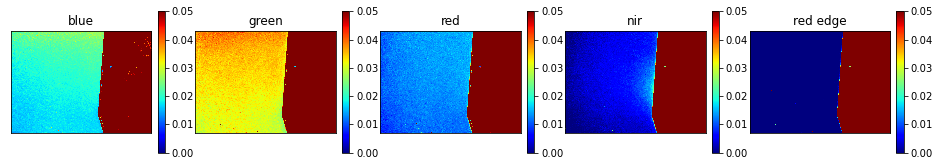

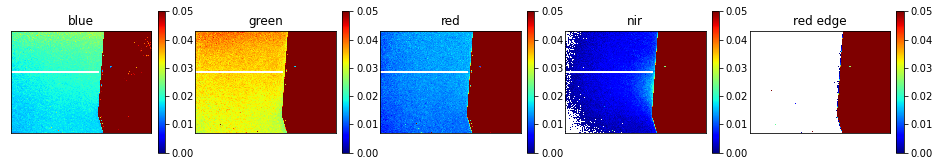

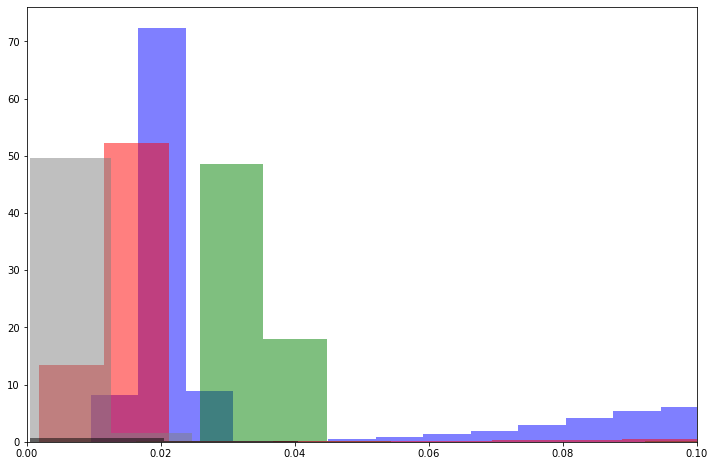

In [36]:
lowest_percent = 0.99
dark_pix_dark = visualize_darkest_pixels(sea_imgs[20], lowest_percent=lowest_percent, band=4)

In [32]:
np.nanmean(dark_pix_dark,axis=(1,2))

array([0.06194952, 0.10385498, 0.10513235, 0.19733073, 0.52549192])

In [33]:
np.nanmean(dark_pix_dark,axis=(1,2))

array([0.06194952, 0.10385498, 0.10513235, 0.19733073, 0.52549192])

In [34]:
np.mean(sea_imgs[4],axis=(1,2))

array([0.02718691, 0.04342138, 0.0200103 , 0.01245761, 0.00393432,
       0.85441996])

In [35]:
np.mean(sea_imgs[3],axis=(1,2))

array([0.02662131, 0.0434078 , 0.01997875, 0.01237048, 0.00378113,
       0.84847539])

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


0


/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2236014
2236014
2236014
2236014
2236014
0
2236014
2236014
2236014
2236014
2236014
0
2236014
2236014
2236014
2236014
2236014
0
2236014
2236014
2236014
2236014
2236014
0
2236014
2236014
2236014
2236014
2236014


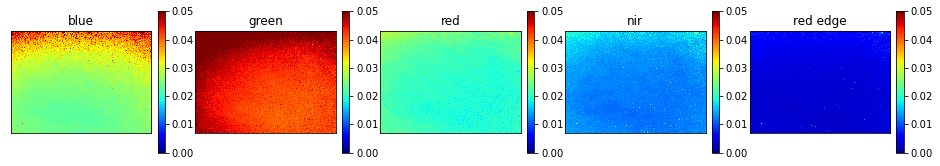

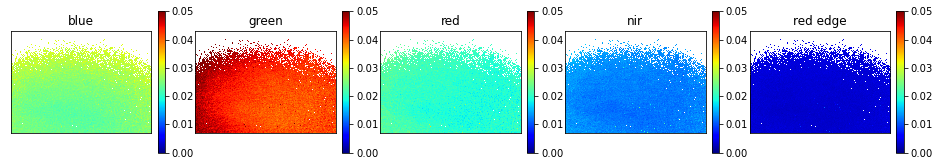

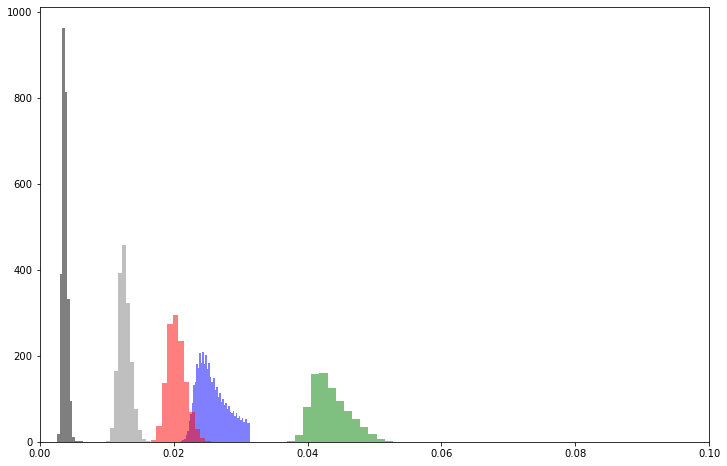

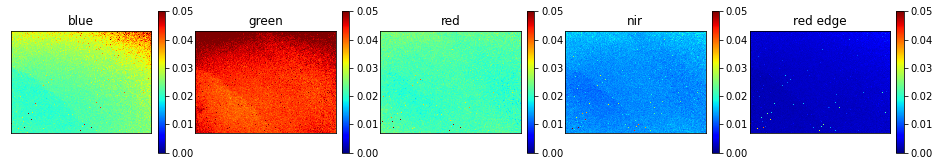

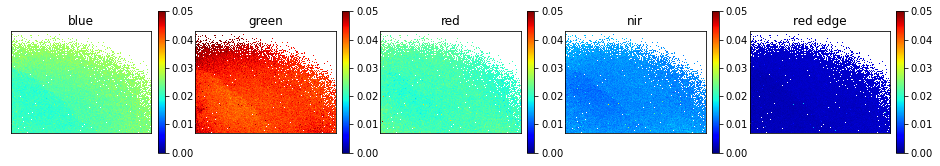

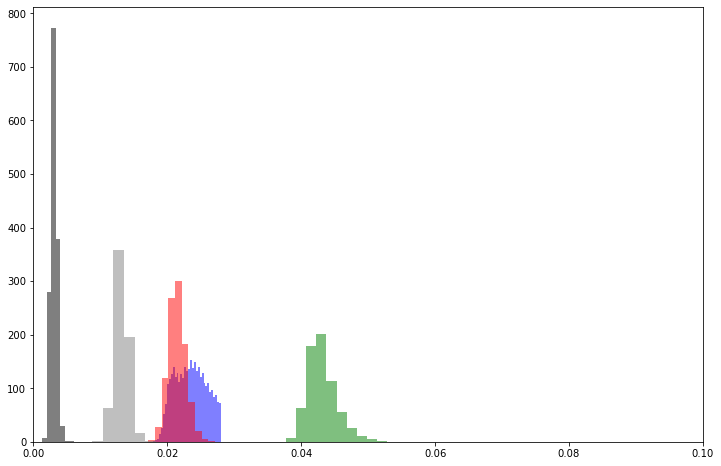

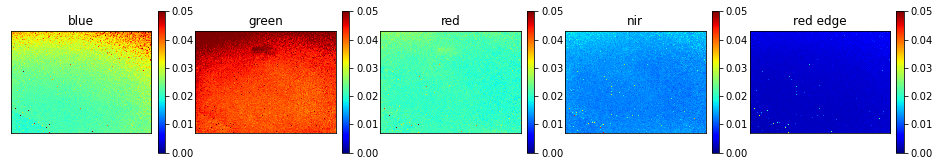

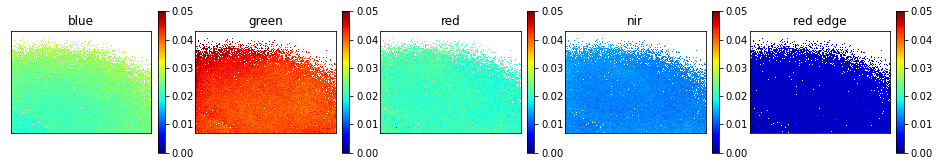

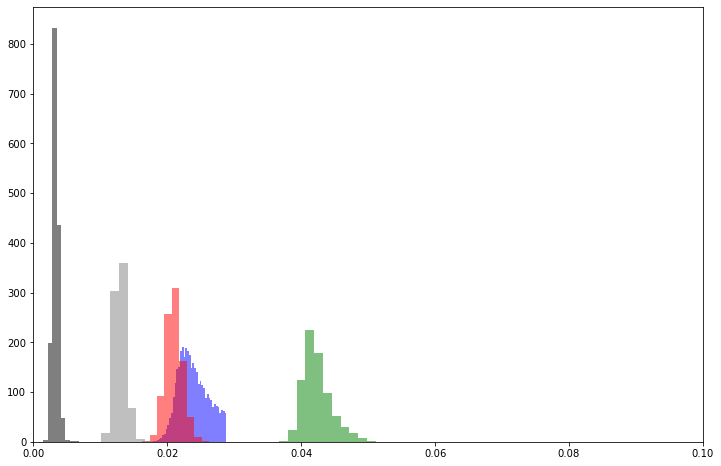

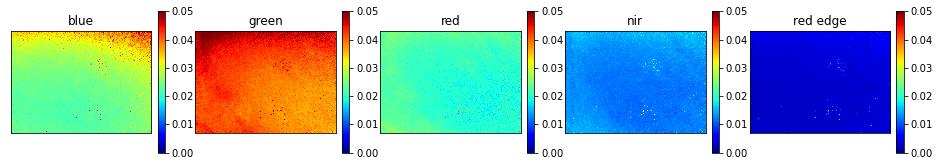

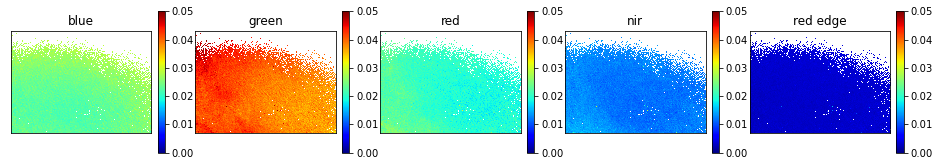

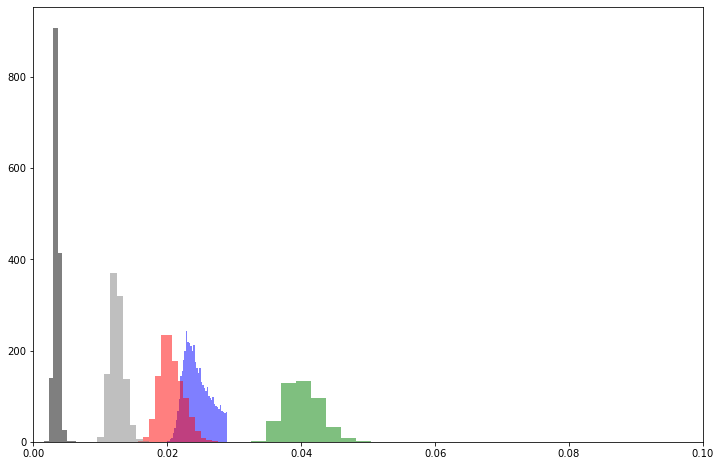

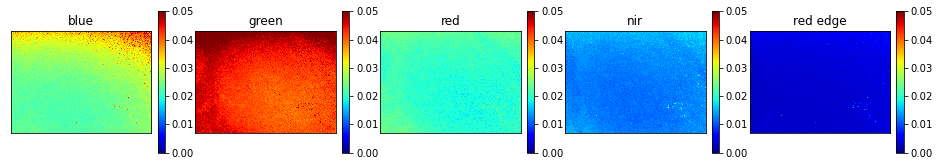

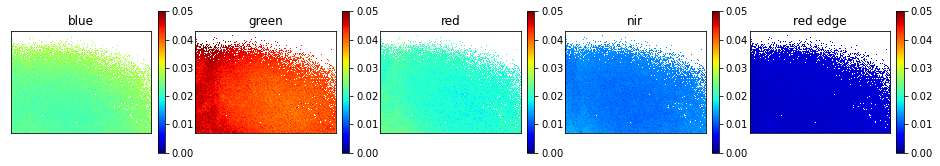

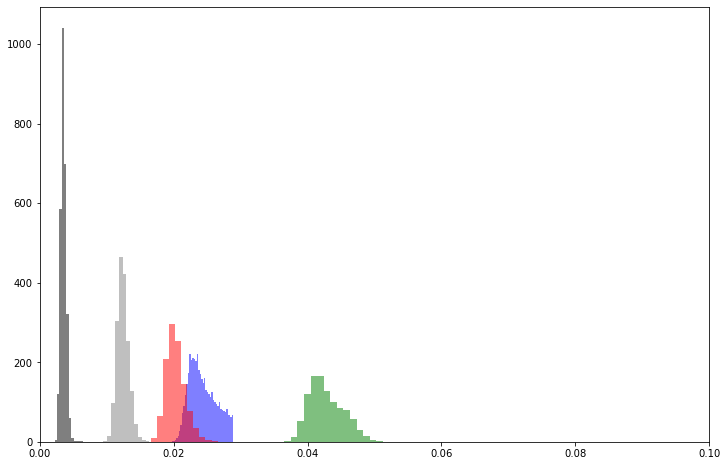

In [62]:
for i in range(0,5):
    visualize_darkest_pixels(sea_imgs[i], lowest_percent=lowest_percent, only_img=False)

Calculate spectra based on that brightness threshold

0
0 0.003204345703125
1
1 0.0035400390625
2
2 0.00341796875
3
3 0.003448486328125
4
4 0.003570556640625
5
5 0.003570556640625
6
6 0.00360107421875
7
7 0.003662109375
8
8 0.00372314453125
9
9 0.003387451171875
10
10 0.00341796875
11
11 0.0032958984375
12
12 0.417266845703125
13
13 0.003143310546875
14
14 0.003570556640625
15
15 0.00311279296875
16
16 0.003082275390625
17
17 0.003631591796875
18
18 0.003662109375
19
19 0.003265380859375
20
20 1.0
21
21 0.00341796875
22
22 0.003448486328125
23
23 0.003570556640625
24
24 0.003631591796875
25
25 0.003570556640625
26
26 0.003570556640625
27
27 0.003326416015625
28
28 0.00335693359375
29
29 0.00286865234375
30
30 0.003570556640625
31
31 0.003448486328125
32
32 0.003448486328125
33
33 0.003021240234375
34
34 0.003448486328125


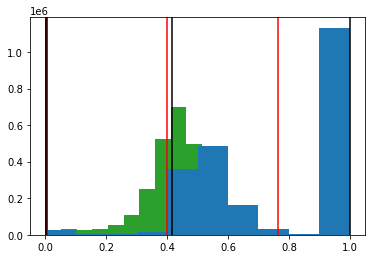

In [42]:
lowest_percent = .75

sea_spectra, sea_idxs = calculate_spectra_from_darkest_px(sea_imgs, lowest_percent=lowest_percent, band=4, visualize=True)

In [43]:
#remove outliers as necessary
#del sea_spectra[162]
#del sea_img_metadata[162]

0
0 0.01873779296875
1
1 0.017852783203125
2
2 0.018829345703125
3
3 0.01861572265625
4
4 0.020294189453125
5
5 0.018585205078125
6
6 0.01873779296875
7
7 0.01910400390625
8
8 0.019287109375
9
9 0.018524169921875
10
10 0.019622802734375
11
11 0.019134521484375
12
12 0.019134521484375
13
13 0.018890380859375


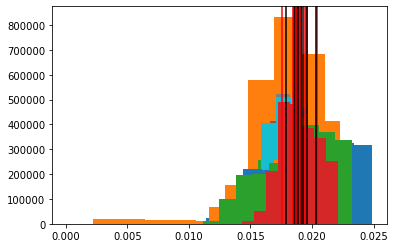

In [44]:
lowest_percent = .75

sky_spectra = calculate_spectra_from_darkest_px(sky_imgs, lowest_percent=lowest_percent, band=4, visualize=True, sky=True)

In [45]:
sea_imgs[0,:-1].shape

(5, 1471, 2024)

In [46]:
#visualize_chla_across_thresholds(sea_imgs[0,:-1], sky_spectra)

In [47]:
sky_spectra[0][0]

[0.11795431652207417,
 0.07077739543911395,
 0.03472944463198011,
 0.031085483267792004,
 0.019048763115276122]

Inspect variability of spectra

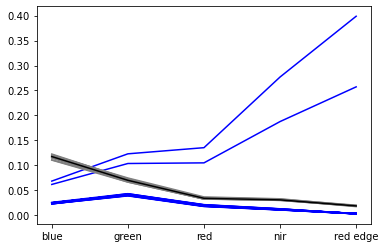

In [48]:
band_names = ['blue', 'green', 'red', 'nir', 'red edge']
for spectra in sea_spectra:
    plt.plot(band_names, spectra, color='blue')
    
for spectra in sky_spectra[0]:
    plt.plot(band_names, spectra, color='grey')
plt.plot(np.median(sky_spectra[0], axis=0), color='black')

TODO could easily filter the images based on the differences in the blue band after a quick check

### Correct for sun glint

TODO currently just averaging sky spectra for removal but could easily interpolate across and incorporate time into which is chosen

In [49]:
def sun_glint_removal(sea_spectra, sky_spectra, wind_speed, method='ruddick2006'):
    sky_spectra = np.median(sky_spectra,axis=0)
    water_leaving_spectra = []
    # TODO will add in Zhang and other approaches
    if method == 'ruddick2006':
        for water_spec in sea_spectra:
            water_leaving = np.array(water_spec) - np.array(sky_spectra) * (0.0256 + 0.00039 * wind_speed + 0.000034 * wind_speed * wind_speed)
            water_leaving_spectra.append(water_leaving)
    return(water_leaving_spectra)

In [50]:
# TODO will pull this from the ship CSV in practice
wind_speed = 3
water_leaving_spec = sun_glint_removal(sea_spectra, sky_spectra[0], wind_speed=wind_speed)

#### Inspect the output from the removal

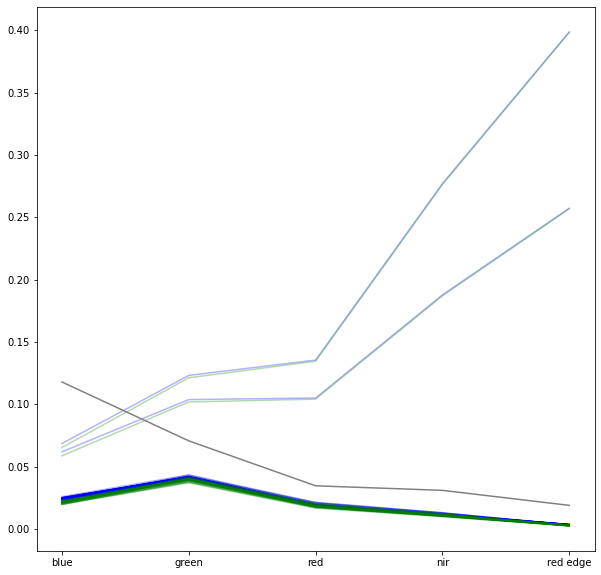

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

for spectra in sea_spectra:
    ax.plot(band_names, spectra, color='blue', alpha=0.3)
    
for spectra in water_leaving_spec:
    ax.plot(band_names, spectra, color='green', alpha=0.3)
    
ax.plot(band_names, np.array(sky_spectra[0][0]), color='grey')
#ax.plot(seaimgset.captures[capture_num].band_names_lower(), [0.13079345, 0.08020303, 0.05103283, 0.04054285, 0.04573154])

### Chlorophyll retrieval algorithm

TODO will need to modify the coefficients of this algorithm if possible
TODO will need to interpolate the spectra from the senop into the right band widths for this algorithm at this step

Run chla retrieval on water leaving spectra

In [52]:
chla_list = []
for spectra in water_leaving_spec:
    chla = L2chlor_a(spectra[0],spectra[0],spectra[1],spectra[1],spectra[2])
    chla_list.append(chla)

In [53]:
chla_list

[14.073602349741785,
 12.24934494381921,
 12.538352668806834,
 13.028209588075207,
 12.111782504074299,
 12.04356627840871,
 12.021885798608757,
 11.75678289991892,
 11.810696689669058,
 13.243276366721563,
 12.940330164713885,
 13.167827458077301,
 12.61385109398054,
 12.684768268222074,
 12.045296198030393,
 14.570836224943024,
 17.08183842949571,
 11.681966906548316,
 11.747865592742526,
 14.832869201618777,
 9.949782126174577,
 12.5551898218905,
 12.937714966884943,
 12.153736757847208,
 13.047095227488056,
 12.067545556126703,
 12.14736162363556,
 12.786763821893985,
 13.401699385067683,
 18.917190568675636,
 11.955066219396477,
 13.626647436927476,
 12.400506612241443,
 13.367227092746958,
 10.861981192727782]

### Save spectra and chla values as a geopandas dataframe along with image metadata

In [54]:
# TODO need to filter out for bad lat and lon and bad chl values
# it seems like sometimes lat and long are 0

In [55]:
from datetime import datetime
import pandas as pd

def convert_to_ocean_color_gdf(chla_list, spectra_list, img_metadata):
    chla_dates = []
    for im in img_metadata:
        date_time_str = im['Date'] + ' ' + im['UTC-Time']

        date_time_obj = datetime.strptime(date_time_str, '%m/%d/%Y %H:%M:%S')
        chla_dates.append(date_time_obj)
    lons = []
    lats = []
    alts = []
    for im in img_metadata:
        lons.append(im['Longitude'])
        lats.append(im['Latitude'])
        alts.append(im['Altitude'])
        
    chla_df = pd.DataFrame(
    {'chla': chla_list,
     'Latitude': lats,
     'Longitude': lons,
     'Altitude' : alts,
     'spectra' : spectra_list,
     'time' : chla_dates})

    chla_gdf = gpd.GeoDataFrame(
        chla_df, geometry=gpd.points_from_xy(chla_df.Longitude, chla_df.Latitude))
    
    return(chla_gdf)

In [56]:
gdf = convert_to_ocean_color_gdf(chla_list, water_leaving_spec, [sea_img_metadata[i] for i in sea_idxs])

gdf.head()

chla   Latitude  Longitude  Altitude  \
0  14.073602  34.714147 -76.674047      35.8   
1  12.249345  34.714364 -76.677103      48.0   
2  12.538353  34.714147 -76.674044      75.7   
3  13.028210  34.714142 -76.674056      61.5   
4  12.111783  34.714142 -76.674053      88.4   

                                             spectra                time  \
0  [0.02046830919360199, 0.03911232517308879, 0.0... 2021-03-04 16:33:54   
1  [0.020593993790557895, 0.03787406464638217, 0.... 2021-03-04 16:21:27   
2  [0.0213199039592956, 0.03946331240410347, 0.01... 2021-03-04 16:32:57   
3  [0.021381635013382725, 0.0399991062330259, 0.0... 2021-03-04 16:28:00   
4  [0.02180921271743772, 0.03998341670863606, 0.0... 2021-03-04 16:29:52   

                     geometry  
0  POINT (-76.67405 34.71415)  
1  POINT (-76.67710 34.71436)  
2  POINT (-76.67404 34.71415)  
3  POINT (-76.67406 34.71414)  
4  POINT (-76.67405 34.71414)

<AxesSubplot:>

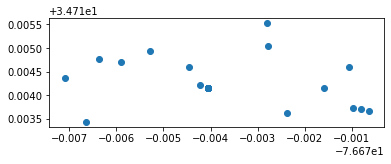

In [57]:
gdf.plot()

Save out the file

In [58]:
gdf.time = gdf.time.astype(str)
gdf.spectra = gdf.spectra.astype(str)
#gdf.to_file('data/260920_shearwateroffshore_dual/uas_data_260920_1_dark.shp')

### Inspect Full Images

In [59]:
sky_spectra[0][0]

[0.11795431652207417,
 0.07077739543911395,
 0.03472944463198011,
 0.031085483267792004,
 0.019048763115276122]

In [63]:
sea_imgs[20,:5].shape

(5, 1471, 2024)

In [62]:
dark_pix_dark.shape

(5, 1471, 2024)

In [197]:
sea_imgs[i,0].shape

(1471, 2024)

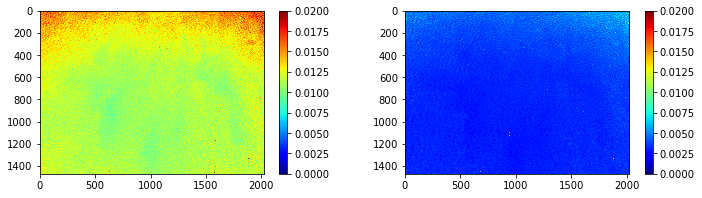

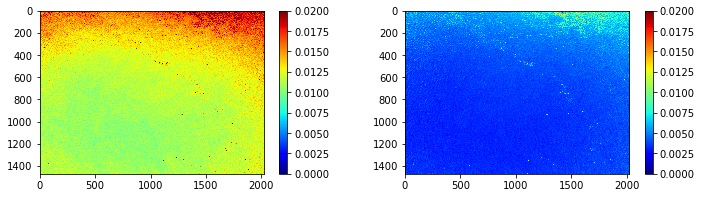

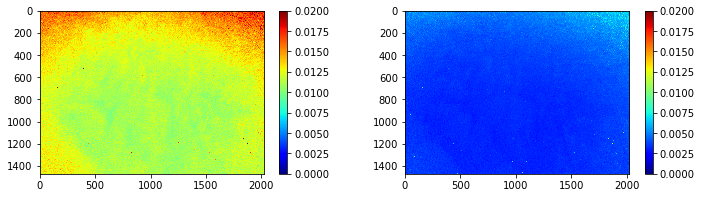

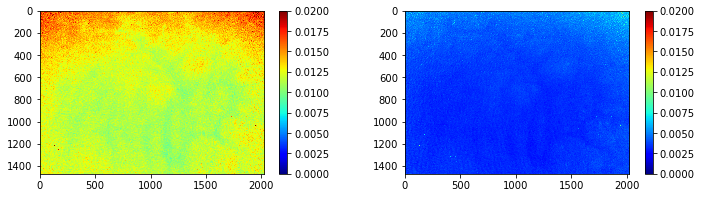

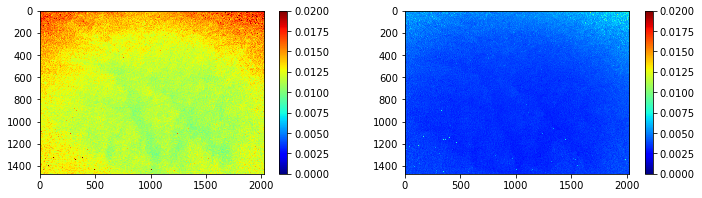

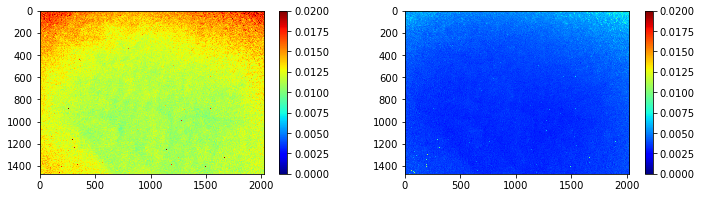

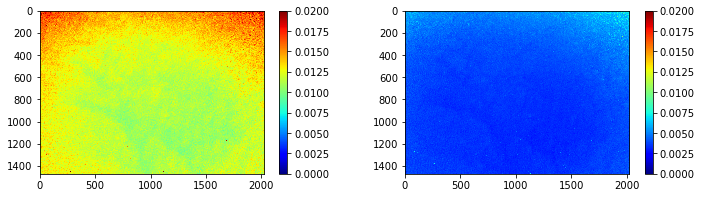

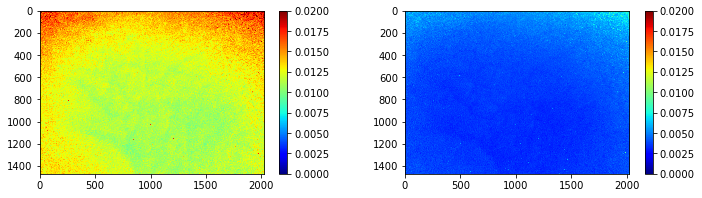

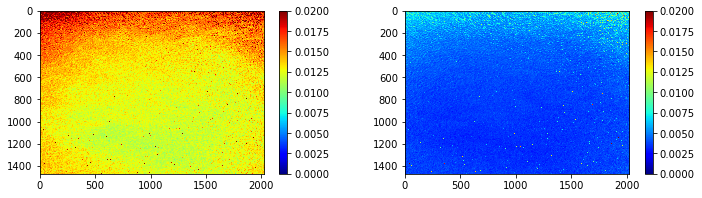

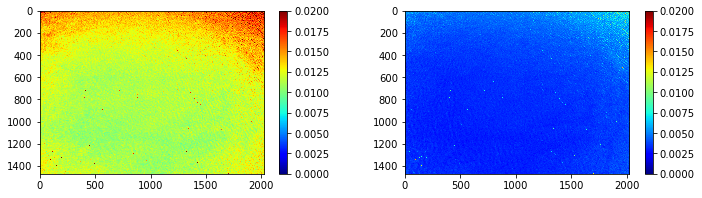

In [225]:
for i in range(0,10):
    fig, ax = plt.subplots(1,2, figsize=(12,3))
    im = ax[0].imshow(sea_imgs[i,3], interpolation='none', 
                   cmap='jet', vmin=0, vmax=.02)
    fig.colorbar(im,ax=ax[0])
    im2 = ax[1].imshow(sea_imgs[i,4], interpolation='none', 
                   cmap='jet', vmin=0, vmax=.02)
    fig.colorbar(im2,ax=ax[1])
    plt.show()

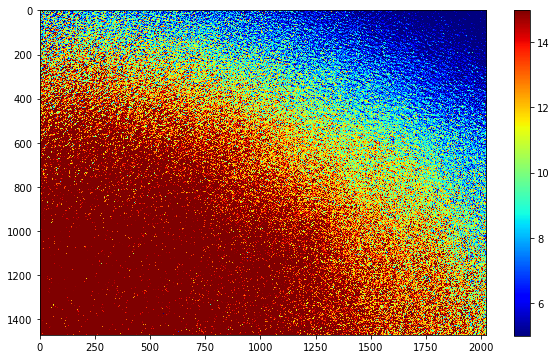

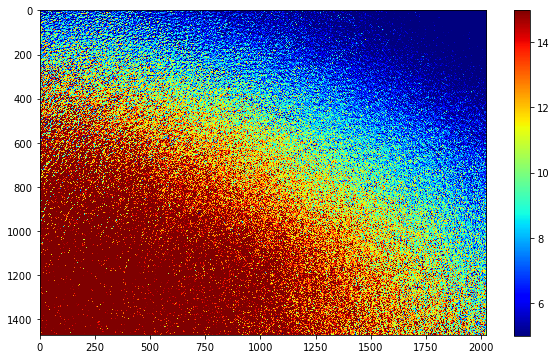

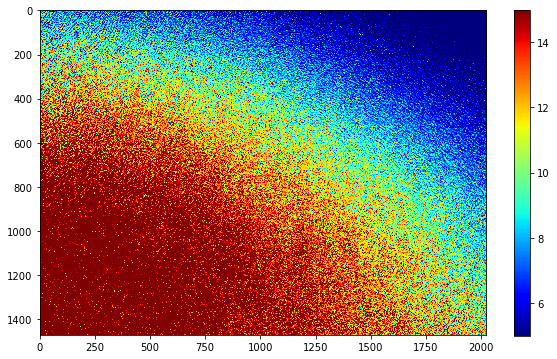

KeyboardInterrupt: 

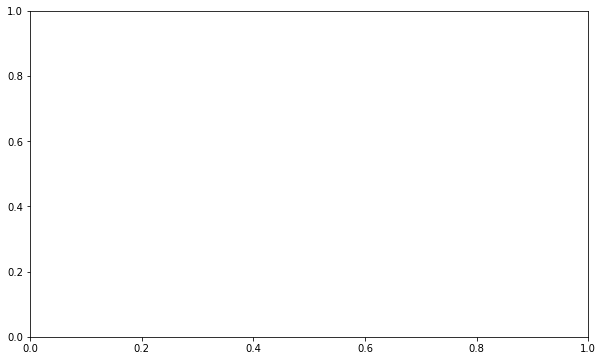

In [217]:
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(10,6))
    im = ax.imshow(chla_img(sky_spectra[0][0], sea_imgs[i,:5]), interpolation='none', 
                   cmap='jet', vmin=5, vmax=15)
    fig.colorbar(im)
    plt.show()

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


0


/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


893191
893191
893191
893191
893191


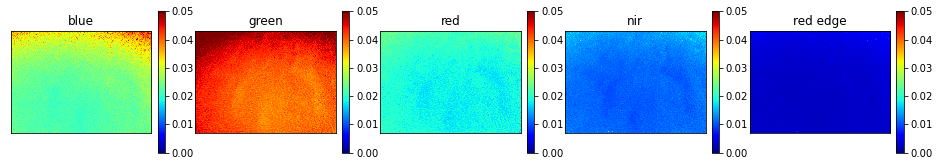

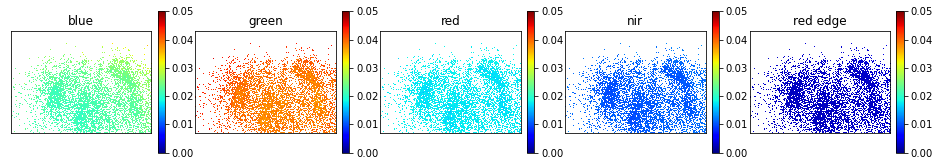

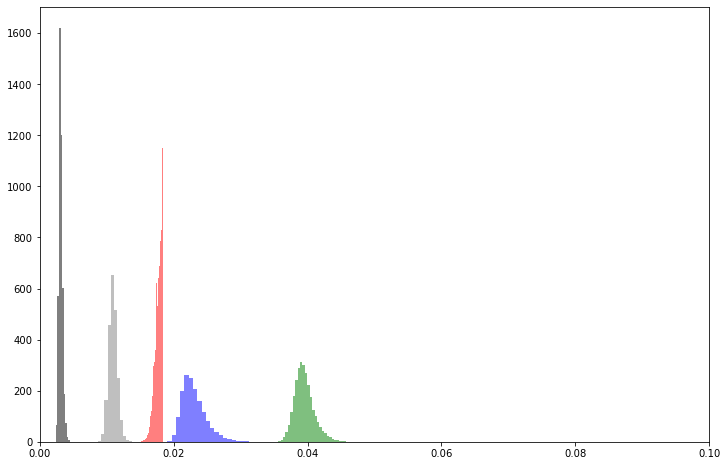

In [226]:
lowest_percent = 0.30
dark_pix_dark = visualize_darkest_pixels(sea_imgs[0], lowest_percent=lowest_percent, band=2)

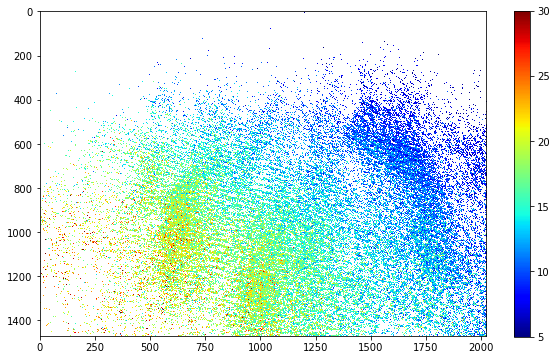

In [227]:
full_img_chla = chla_img(sky_spectra[0][0], dark_pix_dark)
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(full_img_chla, interpolation='none', 
               cmap='jet', vmin=5, vmax=30)
fig.colorbar(im)
plt.show()

(array([4.20100e+03, 1.71504e+05, 3.73111e+05, 2.73475e+05, 6.39130e+04,
        6.40300e+03, 5.41000e+02, 3.50000e+01, 6.00000e+00, 2.00000e+00]),
 array([ 1.03426785,  5.94312825, 10.85198865, 15.76084905, 20.66970946,
        25.57856986, 30.48743026, 35.39629066, 40.30515106, 45.21401147,
        50.12287187]),
 <BarContainer object of 10 artists>)

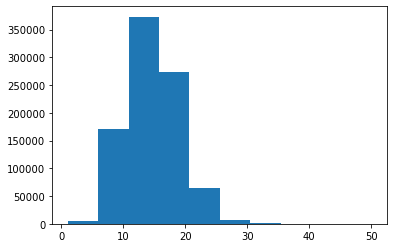

In [228]:
plt.hist(full_img_chla.flatten())

In [64]:
full_img_chla = chla_img(sky_spectra[0][0], dark_pix_dark)
np.nanmax(full_img_chla), np.nanmedian(full_img_chla), np.nanmean(full_img_chla)

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10


(4349.881041412044, 13.757868259444557, 15.446596623431795)

In [65]:
dark_pix_dark.shape

(5, 1471, 2024)

In [66]:
full_img_chla.shape

(1471, 2024)

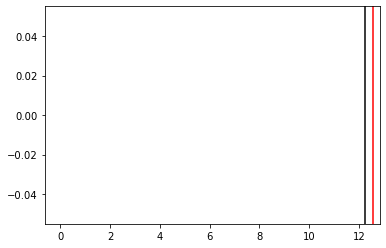

In [86]:
plt.hist(full_img_chla.flatten(), range=(0,1), bins=150)
plt.axvline(np.nanmedian(full_img_chla), c='black')
plt.axvline(np.nanmean(full_img_chla), c='red')
plt.show()

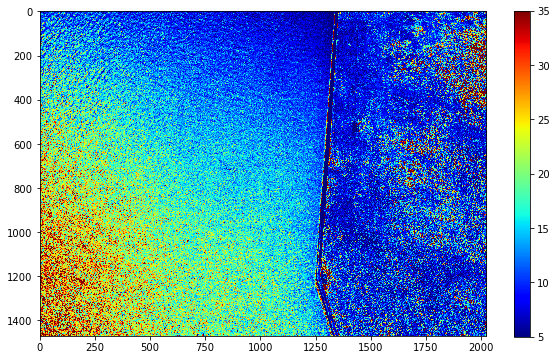

In [193]:
import matplotlib
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(full_img_chla, interpolation='none', cmap='jet', vmin=5, vmax=35)
#current_cmap = matplotlib.cm.get_cmap()
#current_cmap.set_bad(color='yellow')

fig.colorbar(im)

In [68]:
sea_img_metadata[20]

{'Latitude': 34.71503611111111,
 'Longitude': -76.67278333333334,
 'Altitude': 49.7,
 'UTC-Time': '16:42:39',
 'Date': '03/04/2021',
 'filename': 'E45sc4hbvlT74PwMEpNU.tif'}

### warping, geolocating, and transforming the images 

In [107]:
! ls data

040321_duml_testing  260920_shearwateroffshore_dual


In [70]:
import exifread
# Open image file for reading (binary mode)
#path_name = 'data/040321_duml_testing/seastacks/44DXRG0cX4QdVTZKXOFs.tif'
path_name = 'data/040321_duml_testing/0005SET/000/IMG_0097_4.tif'
#path_name = 'data/040321_duml_testing/0005SET/003/IMG_0713_3.tif'
#path_name = 'data/040321_duml_testing/0005SET/003/IMG_0685_2.tif'
path_name = 'data/040321_duml_testing/seastacks/E45sc4hbvlT74PwMEpNU.tif'



f = open(path_name, 'rb')

# Return Exif tags
tags = exifread.process_file(f)
tags

{'Image ImageWidth': (0x0100) Short=2024 @ 18,
 'Image ImageLength': (0x0101) Short=1471 @ 30,
 'Image BitsPerSample': (0x0102) Short=[16, 16, 16, 16, 16, 16] @ 182,
 'Image Compression': (0x0103) Short=Adobe Deflate @ 54,
 'Image PhotometricInterpretation': (0x0106) Short=1 @ 66,
 'Image StripOffsets': (0x0111) Long=[] @ 194,
 'Image SamplesPerPixel': (0x0115) Short=6 @ 90,
 'Image RowsPerStrip': (0x0116) Short=2 @ 102,
 'Image StripByteCounts': (0x0117) Long=[] @ 17858,
 'Image PlanarConfiguration': (0x011C) Short=2 @ 126,
 'Image Predictor': (0x013D) Short=None @ 138,
 'Image ExtraSamples': (0x0152) Short=UnspecifiedUnspecifiedUnspecifiedUnspecifiedUnspecified @ 35522,
 'Image SampleFormat': (0x0153) Short=UnsignedUnsignedUnsignedUnsignedUnsignedUnsigned @ 35532,
 'GPS GPSVersionID': (0x0000) Byte=[2, 3, 0, 0] @ 35554,
 'GPS GPSLatitudeRef': (0x0001) ASCII=N @ 35566,
 'GPS GPSLatitude': (0x0002) Ratio=[34, 42, 5413/100] @ 35658,
 'GPS GPSLongitudeRef': (0x0003) ASCII=W @ 35590,
 'GP

Worth noting that this notebook https://github.com/micasense/imageprocessing/blob/e3744671c521056de46c3d05c3e9446a971662c9/MicaSense%20Image%20Processing%20Tutorial%203.ipynb has this caveat about the sensor:
        
An onboard orientation sensor provides a fairly rough version of the earth-fixed orientation of the DLS. The quality of this orientation varies based on the quality of the sensor installation and calibration, but in even the best cases it has a few degrees of error.

In [121]:
path_name

'data/040321_duml_testing/tmp/seastacks.2/jgPUrJ9KYdIlGt5AMm13.tif'

In [124]:
import os
import micasense.image as image
img = image.Image(path_name)

ValueError: Provided file path does not have a band name: data/040321_duml_testing/tmp/seastacks.2/jgPUrJ9KYdIlGt5AMm13.tif

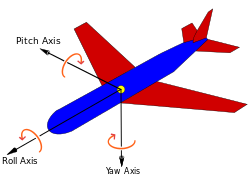

In [586]:
import math
# this fcn returns (yaw,pitch,roll) tuples in radians of the earth-fixed dls pose
yaw, pitch, roll = np.array([img.dls_yaw, img.dls_pitch, img.dls_roll]) * 180/math.pi # convert this to degrees from rads for cameratransform
img.dls_yaw, img.dls_pitch, img.dls_roll, yaw, pitch, roll

(-1.0416555191202088,
 -0.05914077132144412,
 0.1633945449319001,
 -59.682464952096794,
 -3.388516593867085,
 9.36181782005857)

In [122]:
sensor_offset = 40 # this is the difference of the sensor and the DLS

In [123]:
img.focal_length

NameError: name 'img' is not defined

In [128]:
img.focal_plane_resolution_px_per_mm

NameError: name 'img' is not defined

In [129]:
img.size()

NameError: name 'img' is not defined

In [130]:
full_img_chla.shape

(1473, 2024)

In [591]:
# intrinsic camera parameters
f = img.focal_length # returns focal length in mm
# dividing the pixel size by the focal plane resolution in mm to get sensor size - px/(px/mm) leaves mm
sensor_size = img.size()[0] / img.focal_plane_resolution_px_per_mm[0], img.size()[1] / img.focal_plane_resolution_px_per_mm[1]    # in mm
image_size = img.size()    # in px

f, sensor_size, image_size

(7.821876914999999, (7.12080001139328, 5.32680000852288), (2064, 1544))

In [155]:
! ls data/

040321_duml_testing  260920_shearwateroffshore_dual


In [157]:
import pandas as pd

alta_logs = pd.read_csv('data/040321_duml_testing/SYNLog-16-17-34_04-03-2021_edit.csv')
alta_logs.head()

/home/clifgray/anaconda3/envs/micasense_ocean_color/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (0,1,2,4,5,6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading IMU Time      Date  GPS Time Unnamed: 4   Longitude   Latitude  \
0      26    0.976  20210304  16:17:34        NaN  -766727168  347156224   
1      28    1.056  20210304  16:17:34        NaN  -766727168  347156224   
2      29    1.096  20210304  16:17:34        NaN  -766727168  347156224   
3      30    1.136  20210304  16:17:34        NaN  -766727168  347156224   
4      31    1.176  20210304  16:17:35        NaN  -766727168  347156256   

  GPS Height  GPS Course GPS Pos N  ...  Gyro Bias R  Gyro Bias P  \
0       -0.3        22.8     -1.26  ...      11.3907     -33.8277   
1       -0.3        22.8     -1.26  ...      11.3907     -33.8290   
2       -0.3        22.8     -1.26  ...      11.3901     -33.8293   
3       -0.3        22.8     -1.26  ...      11.3899     -33.8297   
4       -0.3        22.8     -1.25  ...      11.3899     -33.8309   

   Gyro Bias Y  Accel Bias X  Accel Bias Y  Accel Bias Z  Extended Status  \
0       6.4131           0.0           0.0         0.246              0.0   
1       6.4075           0.0           0.0         0.246              0.0   
2       6.4075          -0.0          -0.0         0.246              0.0   
3       6.4073          -0.0          -0.0         0.246              0.0   
4       6.4074          -0.0          -0.0         0.246              0.0   

   5V Alarm  Z Vibration  Checksum  
0       0.0         0.03      54.0  
1       0.0         0.03     249.0  
2       0.0         0.03      28.0  
3       0.0         0.03     107.0  
4       0.0         0.03     252.0  

[5 rows x 173 columns]

In [159]:
alta_logs.head()['GPS Time'][0]

'16:17:34'

In [78]:
f = 7.8218769
sensor_size = (7.12080001139328, 5.32680000852288)
image_size = (2024, 1471)

In [72]:
img.latitude, img.longitude, img.altitude

NameError: name 'img' is not defined

In [ ]:
-76.6727872 34.7150272 50.45



In [175]:
import cameratransform as ct

cam = ct.Camera(ct.RectilinearProjection(focallength_mm=f,
                                         sensor=sensor_size,
                                         image=image_size),
               ct.SpatialOrientation(elevation_m=50.45, # img.altitude,
                                     tilt_deg=40,
                                     roll_deg=0,
                                    heading_deg=-74.2+3.7,
                                    pos_x_m=0, pos_y_m=0))

# gps pts are lat lon
cam.setGPSpos(34.7150272, -76.6727872, 50.45)

In [176]:
# convert from space to top down image pixel location
# space location / scaling factor - half the image

def spacetotopdown(top_im, cam, image_size, scaling):
    x1 = top_im.shape[0]/2 + cam.spaceFromImage([0,0])[0] / scaling
    y1 = top_im.shape[1]/2 - cam.spaceFromImage([0,0])[1] / scaling
    
    x2 = top_im.shape[0]/2 + cam.spaceFromImage([image_size[0]-1,0])[0] / scaling
    y2 = top_im.shape[1]/2 - cam.spaceFromImage([image_size[0]-1,0])[1] / scaling
    
    x3 = top_im.shape[0]/2 + cam.spaceFromImage([image_size[0]-1,image_size[1]-1])[0] / scaling
    y3 = top_im.shape[1]/2 - cam.spaceFromImage([image_size[0]-1,image_size[1]-1])[1] / scaling
    
    x4 = top_im.shape[0]/2 + cam.spaceFromImage([0,image_size[1]-1])[0] / scaling
    y4 = top_im.shape[1]/2 - cam.spaceFromImage([0,image_size[1]-1])[1] / scaling
    return(np.array([[x1,y1], [x2,y2], [x3,y3], [x4,y4]]))
    #return([x1,x2,x3,x4],[y1, y2, y3,y4])

In [177]:
full_img_chla.shape

(1471, 2024)

In [178]:
im

array([[0.01049805, 0.00778198, 0.00817871, ..., 0.18991089, 0.19396973,
        0.20147705],
       [0.01132202, 0.0090332 , 0.01025391, ..., 0.19143677, 0.1946106 ,
        0.20578003],
       [0.01235962, 0.00946045, 0.0098877 , ..., 0.1895752 , 0.19259644,
        0.1986084 ],
       ...,
       [0.00778198, 0.00662231, 0.00732422, ..., 0.20117188, 0.18640137,
        0.19921875],
       [0.00421143, 0.00640869, 0.00827026, ..., 0.1831665 , 0.19113159,
        0.22332764],
       [0.00704956, 0.00637817, 0.00830078, ..., 0.2019043 , 0.20013428,
        0.21533203]])

In [179]:
np.mean(im)

0.08219934418815791

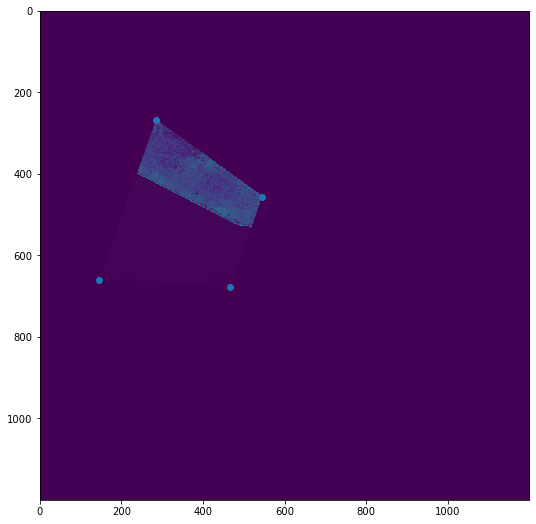

In [180]:
fig,ax = plt.subplots(figsize=(9,9))
scaling = .2
im = sea_imgs[20,2].copy() #plt.imread(path_name)
#im[np.isnan(im)] = 0
top_im = cam.getTopViewOfImage(im, [-120, 120,-120, 120], scaling=scaling, do_plot=False)
ax.imshow(top_im, interpolation='none', vmin=0, vmax=1)
# ax.set_xlabel("x position in m")
# ax.set_ylabel("y position in m");
ax.scatter(spacetotopdown(top_im, cam, image_size, scaling)[:,0], spacetotopdown(top_im, cam, image_size, scaling)[:,1])

Get the geographic coordinates of the image

In [181]:
coords = np.array([
    cam.gpsFromImage([0               , 0]), \
    cam.gpsFromImage([image_size[0]-1 , 0]), \
    cam.gpsFromImage([image_size[0]-1 , image_size[1]-1]), \
    cam.gpsFromImage([0               , image_size[1]-1])])

Now get the image coordinates of the corners of the original image but in the top down image

In [182]:
image_coords = spacetotopdown(top_im, cam, image_size, scaling)
image_coords

array([[145.66236679, 659.21798693],
       [284.11199213, 268.24830594],
       [544.42374443, 455.946449  ],
       [466.11459096, 677.08467653]])

Convert all that to GCPs for rasterio

In [183]:
gcp1 = rasterio.control.GroundControlPoint(row=image_coords[0,0], col=image_coords[0,1], x=coords[0,1], y=coords[0,0], z=coords[0,2], id=None, info=None)
gcp2 = rasterio.control.GroundControlPoint(row=image_coords[1,0], col=image_coords[1,1], x=coords[1,1], y=coords[1,0], z=coords[1,2], id=None, info=None)
gcp3 = rasterio.control.GroundControlPoint(row=image_coords[2,0], col=image_coords[2,1], x=coords[2,1], y=coords[2,0], z=coords[2,2], id=None, info=None)
gcp4 = rasterio.control.GroundControlPoint(row=image_coords[3,0], col=image_coords[3,1], x=coords[3,1], y=coords[3,0], z=coords[3,2], id=None, info=None)

In [184]:
[gcp1,gcp2,gcp3,gcp4]

[GroundControlPoint(row=145.6623667937829, col=659.2179869304683, x=-76.67378134725043, y=34.71492068477577, z=0.0, id='4c112030-164e-4a08-a2e2-712fee523327'),
 GroundControlPoint(row=284.1119921299177, col=268.248305937154, x=-76.6734784081278, y=34.71562389625573, z=0.0, id='194e398f-43b4-49a6-a0b9-29a9f714eb79'),
 GroundControlPoint(row=544.4237444288183, col=455.94644899746027, x=-76.67290880829721, y=34.715286298829525, z=0.0, id='2623a977-95e4-4694-832e-c63fd5318837'),
 GroundControlPoint(row=466.11459096249837, col=677.0846765314918, x=-76.67308015781336, y=34.714888552917124, z=0.0, id='55376998-2689-4e92-a9d2-6ea47ccb6195')]

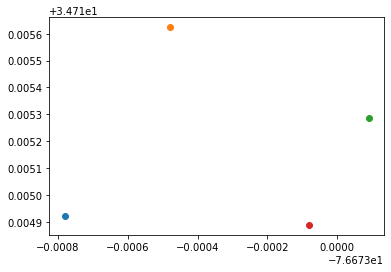

In [185]:
plt.scatter(coords[0,1], coords[0,0])
plt.scatter(coords[1,1], coords[1,0])
plt.scatter(coords[2,1], coords[2,0])
plt.scatter(coords[3,1], coords[3,0])

In [186]:
image_coords[:,0], image_coords[:,1]

(array([145.66236679, 284.11199213, 544.42374443, 466.11459096]),
 array([659.21798693, 268.24830594, 455.946449  , 677.08467653]))

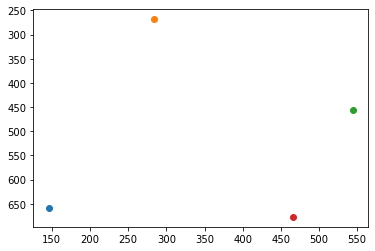

In [187]:
plt.scatter(image_coords[0,0], image_coords[0,1])
plt.scatter(image_coords[1,0], image_coords[1,1])
plt.scatter(image_coords[2,0], image_coords[2,1])
plt.scatter(image_coords[3,0], image_coords[3,1])
plt.gca().invert_yaxis()


Use those GCPs to georeference the image

In [188]:
im.shape

(1471, 2024)

In [189]:
import rasterio
from rasterio.warp import reproject
from rasterio.enums import Resampling

# Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():
    
    # open the original image to get some of the basic metadata
    with rasterio.open(path_name, 'r') as src:
        profile = src.profile
                
        src_crs = "EPSG:4326"  # This is the crs of the GCPs
        dst_crs = "EPSG:4326"

        tsfm = rasterio.transform.from_gcps([gcp1,gcp2,gcp3,gcp4])
        profile.update(
            dtype=rasterio.float32,
            transform = tsfm,
            crs=dst_crs,
            width=top_im.shape[0], # TODO unsure if this is correct order
            height=top_im.shape[1]
        )

        print(profile)

        with rasterio.open('top_im_chla_3_3deg.tif', 'w', **profile) as dst:
            dst.write(top_im.T.astype(rasterio.float32), 1)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1200, 'height': 1200, 'count': 6, 'crs': 'EPSG:4326', 'transform': Affine(1.3710346816489261e-11, 2.1881289142962188e-06, -76.67410008489774,
       -1.798629820762632e-06, 9.90639641844177e-12, 34.716106372653044), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}


In [ ]:
rasterio.float32

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1200, 'height': 1200, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.442792764368845e-11, 2.188128474237518e-06, -76.67410008517777,
       -1.7986297141156628e-06, 9.933885273631402e-12, 34.71610637260553)}


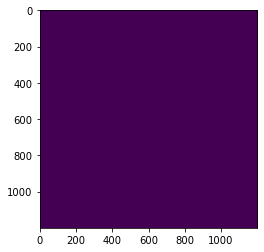

In [123]:
with rasterio.open('top_im_chla_2.tif') as source:
    print(source.read(1))
    plt.imshow(source.read(1))
    print(source.meta)